<a href="https://colab.research.google.com/github/pvrMonchi/FMML-Projects-Labs/blob/main/Group31__Covid_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url='https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv'
df_org=pd.read_csv(url,sep=',')
df_org

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10666,10667,03/31/2020,Wyoming,US,2020-03-31 23:49:27,109.0,0.0,0.0
10667,10668,03/31/2020,Xinjiang,Mainland China,2020-03-31 23:49:27,76.0,3.0,73.0
10668,10669,03/31/2020,Yukon,Canada,2020-03-31 23:49:27,5.0,0.0,0.0
10669,10670,03/31/2020,Yunnan,Mainland China,2020-03-31 23:49:27,182.0,2.0,172.0


In [3]:
import copy
df=copy.deepcopy(df_org)
# Dropping a Last Update Columns
df.drop('Last Update',inplace=True,axis=1)
print("Shape of DataFrame is: ",df.shape)
df

Shape of DataFrame is:  (10671, 7)


,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10666,10667,03/31/2020,Wyoming,US,109.0,0.0,0.0
10667,10668,03/31/2020,Xinjiang,Mainland China,76.0,3.0,73.0
10668,10669,03/31/2020,Yukon,Canada,5.0,0.0,0.0
10669,10670,03/31/2020,Yunnan,Mainland China,182.0,2.0,172.0


Objectives to build:

1) Perform Analysis on Country/Region which region has more confirmed cases,more deaths and recovery.

2) Perform Various algorithms like(Stepwise Regression,Decision trees,Gradeint Boosted Trees(Adaboost,CatBoost,XGBoost),Random Forest,Logistic regression,Concepts of Splines)

3) Perform Cross-Validation to check running status of Algorithms.Make usage of Validation too.

4) Make use of ROC Curve to evaluate Area Under Curve and show a best classifier.

In [4]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,10671.000000,10671.000000,10671.000000,10671.000000
mean,5336.000000,993.821666,40.667229,289.508481
std,3080.596695,6268.835379,398.618024,3010.809184
min,1.000000,0.000000,0.000000,0.000000
25%,2668.500000,3.000000,0.000000,0.000000
50%,5336.000000,31.000000,0.000000,0.000000
75%,8003.500000,229.000000,2.000000,14.000000
max,10671.000000,105792.000000,12428.000000,63153.000000


In [5]:
# On basis of date we are storing dataframe related to them.
date_lst=df['ObservationDate'].unique()
date_dict={}
for i in range(0,len(date_lst)):
  df_temp=df.loc[df['ObservationDate'] == date_lst[i]]
  date_dict[date_lst[i]]=df_temp

In [6]:
date_dict_tot={}
for date,df in date_dict.items():
  date_dict_tot[date]=(df['Confirmed'].sum(),df['Deaths'].sum(),df['Recovered'].sum())

In [7]:
df_date_tots=pd.DataFrame(date_dict_tot)
df_date_tots=df_date_tots.transpose()
df_date_tots.columns=['Confirmed','Deaths','Recovered']
df_date_tots['Closed Cases']=df_date_tots['Deaths']+df_date_tots['Recovered']
df_date_tots['Active Cases']=df_date_tots['Confirmed']-df_date_tots['Closed Cases']
df_date_tots

,Confirmed,Deaths,Recovered,Closed Cases,Active Cases
01/22/2020,555.0,17.0,28.0,45.0,510.0
01/23/2020,653.0,18.0,30.0,48.0,605.0
01/24/2020,941.0,26.0,36.0,62.0,879.0
01/25/2020,1438.0,42.0,39.0,81.0,1357.0
01/26/2020,2118.0,56.0,52.0,108.0,2010.0
...,...,...,...,...,...
03/27/2020,593291.0,27198.0,130915.0,158113.0,435178.0
03/28/2020,660706.0,30652.0,139415.0,170067.0,490639.0
03/29/2020,720117.0,33925.0,149082.0,183007.0,537110.0
03/30/2020,782365.0,37582.0,164566.0,202148.0,580217.0


In [8]:
country_lst=df['Country/Region'].unique()
country_case={}
for i in range(len(country_lst)):
  dummy=df_org.loc[df_org['Country/Region']==country_lst[i]]
  dummy=dummy.transpose()
  dummy=dummy.loc[['ObservationDate','Confirmed','Deaths','Recovered']]
  dummy=dummy.transpose()
  country_case[country_lst[i]]=(dummy['Confirmed'].sum(),dummy['Deaths'].sum(),dummy['Recovered'].sum())
country_case

{'Afghanistan': (1225.0, 29.0, 26.0),
 'Albania': (2232.0, 91.0, 241.0),
 'Algeria': (4828.0, 324.0, 594.0),
 'Andorra': (2787.0, 39.0, 37.0),
 'Angola': (48.0, 6.0, 1.0),
 'Antigua and Barbuda': (61.0, 0.0, 0.0),
 'Argentina': (6494.0, 158.0, 923.0),
 'Armenia': (4099.0, 12.0, 205.0),
 'Australia': (36147.0, 192.0, 2545.0),
 'Austria': (84819.0, 626.0, 2883.0),
 'Azerbaijan': (1915.0, 37.0, 212.0),
 'Bahamas': (86.0, 0.0, 8.0),
 'Bahrain': (7926.0, 41.0, 3046.0),
 'Bangladesh': (546.0, 49.0, 133.0),
 'Barbados': (255.0, 0.0, 0.0),
 'Belarus': (1467.0, 1.0, 347.0),
 'Belgium': (89035.0, 3145.0, 9206.0),
 'Belize': (18.0, 0.0, 0.0),
 'Benin': (68.0, 0.0, 1.0),
 'Bhutan': (46.0, 0.0, 0.0),
 'Bolivia': (682.0, 11.0, 0.0),
 'Bosnia and Herzegovina': (2822.0, 50.0, 72.0),
 'Botswana': (7.0, 1.0, 0.0),
 'Brazil': (37132.0, 976.0, 290.0),
 'Brunei': (1688.0, 4.0, 169.0),
 'Bulgaria': (3576.0, 71.0, 92.0),
 'Burkina Faso': (1901.0, 86.0, 161.0),
 'Burma': (55.0, 1.0, 0.0),
 'Burundi': (2.0, 0.

Text(0.5, 1.0, 'Top 20 Countries with highest Deaths!!')

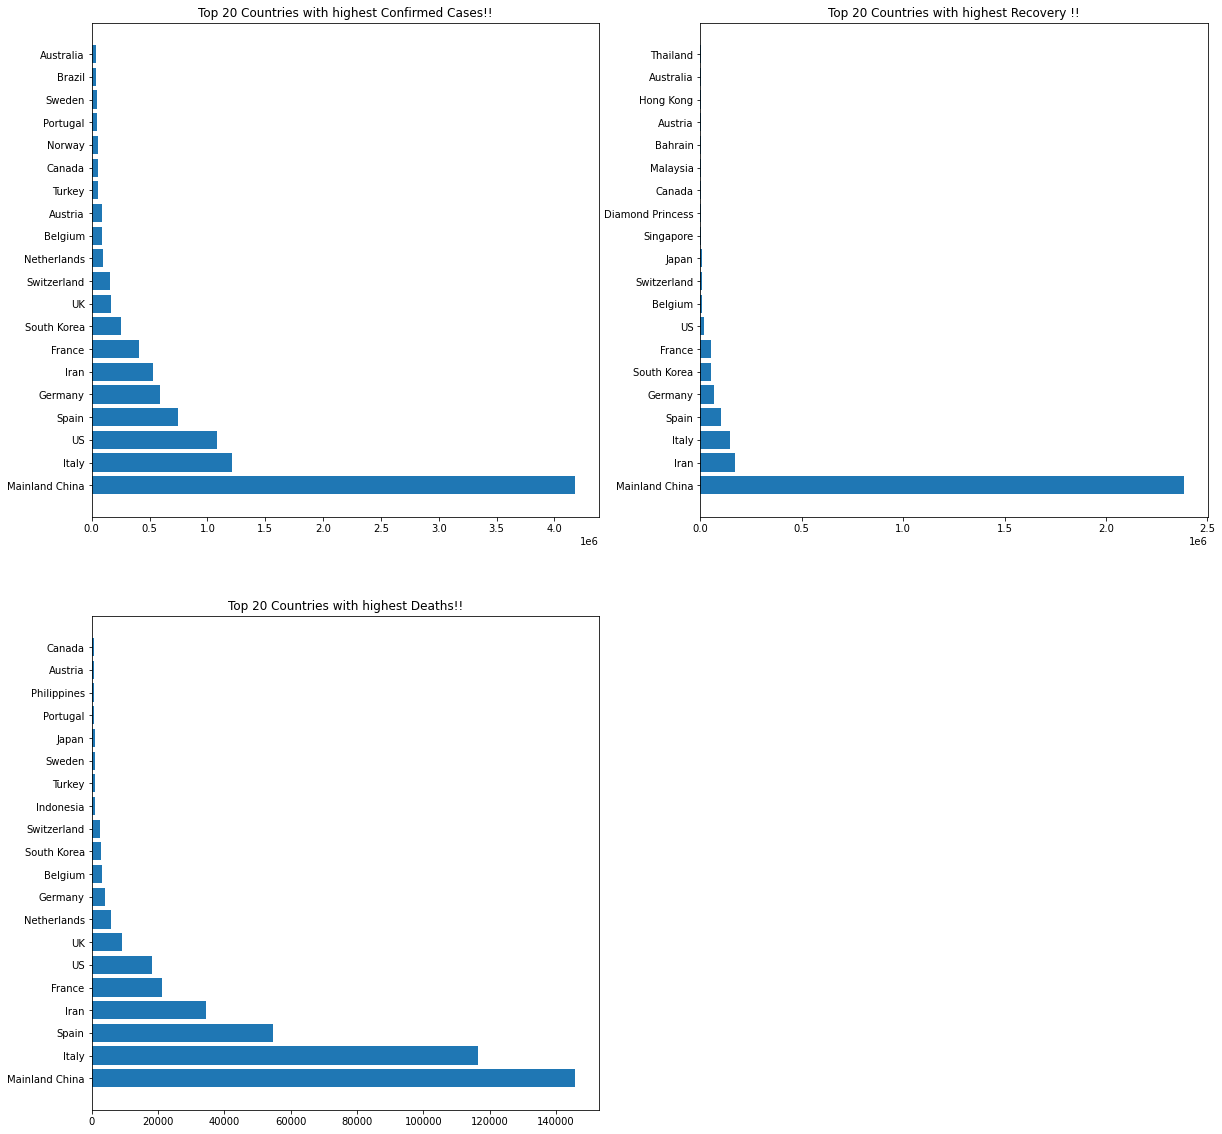

In [9]:
# We need to find those top 10 countries which has highest number of Confirmed Cases.
from collections import defaultdict
confirmed_case,confirmed_deaths,confirmed_recovered={},{},{}
for k,v in country_case.items():
  a,b,c=v
  confirmed_case[a]=k
  confirmed_deaths[b]=k
  confirmed_recovered[c]=k
fig=plt.figure(figsize=(20,20))
a,b=[],[]
cnt=1
for k,v in sorted(confirmed_case.items(),reverse=True):
  if cnt<=20:
    a.append(v)
    b.append(k)
  else:
    break
  cnt+=1
ax1=fig.add_subplot(2,2,1)
ax1.barh(a,b)
ax1.set_title("Top 20 Countries with highest Confirmed Cases!!")

# For highest Recovrey.
a.clear()
b.clear()
cnt=1
for k,v in sorted(confirmed_recovered.items(),reverse=True):
  if cnt<=20:
    a.append(v)
    b.append(k)
  else:
    break
  cnt+=1
ax2=fig.add_subplot(2,2,2)
ax2.barh(a,b)
ax2.set_title("Top 20 Countries with highest Recovery !!")
a.clear()
b.clear()
cnt=1
for k,v in sorted(confirmed_deaths.items(),reverse=True):
  if cnt<=20:
    a.append(v)
    b.append(k)
  else:
    break
  cnt+=1
ax3=fig.add_subplot(2,2,3)
ax3.barh(a,b)
ax3.set_title("Top 20 Countries with highest Deaths!!")

Creating a training,testing,Validation Set.

In [10]:
df_need=copy.deepcopy(df_date_tots)
df_need['Days Since']=[ind+1 for ind in range(df_date_tots.shape[0])]
df_need=df_need[['Days Since','Active Cases','Closed Cases','Deaths','Recovered','Confirmed']]
df_need

,Days Since,Active Cases,Closed Cases,Deaths,Recovered,Confirmed
01/22/2020,1,510.0,45.0,17.0,28.0,555.0
01/23/2020,2,605.0,48.0,18.0,30.0,653.0
01/24/2020,3,879.0,62.0,26.0,36.0,941.0
01/25/2020,4,1357.0,81.0,42.0,39.0,1438.0
01/26/2020,5,2010.0,108.0,56.0,52.0,2118.0
...,...,...,...,...,...,...
03/27/2020,66,435178.0,158113.0,27198.0,130915.0,593291.0
03/28/2020,67,490639.0,170067.0,30652.0,139415.0,660706.0
03/29/2020,68,537110.0,183007.0,33925.0,149082.0,720117.0
03/30/2020,69,580217.0,202148.0,37582.0,164566.0,782365.0


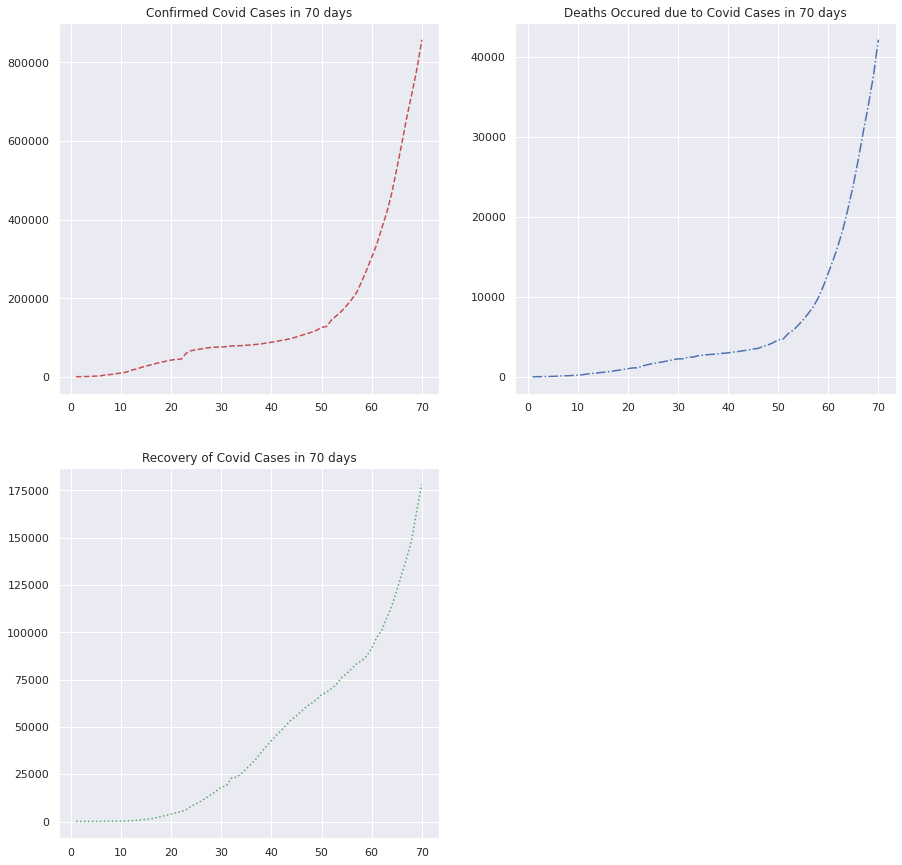

In [11]:
sns.set(style='darkgrid')
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(2,2,1)
ax1.plot(df_need['Days Since'],df_need['Confirmed'],color='r',linestyle='--')
ax1.set_title("Confirmed Covid Cases in 70 days")
ax2=fig.add_subplot(2,2,2)
ax2.plot(df_need['Days Since'],df_need['Deaths'],color='b',linestyle='dashdot')
ax2.set_title("Deaths Occured due to Covid Cases in 70 days")
ax3=fig.add_subplot(2,2,3)
ax3.set_title("Recovery of Covid Cases in 70 days")
ax3.plot(df_need['Days Since'],df_need['Recovered'],color='g',linestyle=':')

In [12]:
# Feature Selection.
df_need.corr()

,Days Since,Active Cases,Closed Cases,Deaths,Recovered,Confirmed
Days Since,1.000000,0.721888,0.916208,0.755738,0.935768,0.789529
Active Cases,0.721888,1.000000,0.911920,0.995194,0.881837,0.993332
Closed Cases,0.916208,0.911920,1.000000,0.941196,0.997624,0.953149
Deaths,0.755738,0.995194,0.941196,1.000000,0.915682,0.998015
Recovered,0.935768,0.881837,0.997624,0.915682,1.000000,0.930306
Confirmed,0.789529,0.993332,0.953149,0.998015,0.930306,1.000000


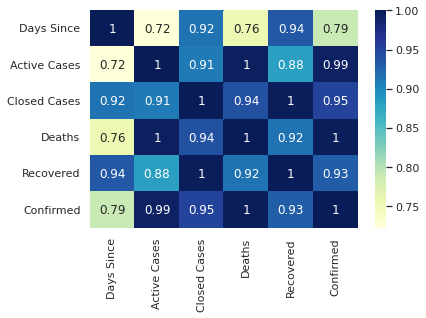

In [13]:
sns.set(style='darkgrid')
sns.heatmap(df_need.corr(),cmap="YlGnBu",annot=True)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Features']=df_need.columns
vif_data['VIF']=[variance_inflation_factor(df_need.values,i) for i in range(len(df_need.columns))]
vif_data

,Features,VIF
0,Days Since,113.323384
1,Active Cases,inf
2,Closed Cases,inf
3,Deaths,inf
4,Recovered,inf
5,Confirmed,inf


After seeing VIF factors,we found high Multicollinearity in dataset so we are taking only one feature to avoid multicollinearity.

In [15]:
from sklearn.model_selection import train_test_split
X_tr, X_test, Y_tr, Y_test = train_test_split(df_need['Days Since'],
                                                    df_need['Confirmed'],
                                                    test_size = 0.15,
                                                    shuffle = False)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_tr,
                                                    Y_tr,
                                                    test_size = 0.10,
                                                    shuffle = False)
X_train,Y_train=np.array(X_train).reshape(len(X_train),1),np.array(Y_train)
X_valid,Y_valid=np.array(X_valid).reshape(len(X_valid),1),np.array(Y_valid)
X_test,Y_test=np.array(X_test).reshape(len(X_test),1),np.array(Y_test)

In [16]:
X_train.shape

(53, 1)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
clf=LogisticRegression(fit_intercept=False)
C=np.random.random(size=(100,1))
logis_grid={'C':[1e-6,1e-5,1e-4,1e-3, 1e-2, 1e-1, 1e0],
            'solver':['newton-cg', 'lbfgs', 'liblinear'],
            'penalty':['l2']
            }
k_cv=KFold(n_splits=3)
logistic_search = RandomizedSearchCV(clf,
                                     logis_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=k_cv,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

logistic_search.fit(X_train, Y_train)

print(logistic_search.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1e-06}


In [18]:
y_log_valid=logistic_search.predict(X_valid)
y_log_test=logistic_search.predict(X_test)
from sklearn.metrics import r2_score
print("Validation Set --> R-Squared Error is: ",r2_score(Y_valid,y_log_valid))
print("Test Set --> R-Squared Error is: ",r2_score(Y_test,y_log_test))

Validation Set --> R-Squared Error is:  -2.4922490066388345
Test Set --> R-Squared Error is:  -4.855253228327023


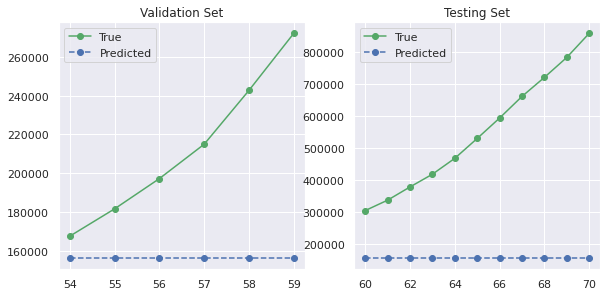

In [19]:
fig_lv=plt.figure(figsize=(15,10))
ax1=fig_lv.add_subplot(2,3,1)
ax1.plot(X_valid,Y_valid,color='g',linestyle='solid',label='True',marker='o')
ax1.plot(X_valid,y_log_valid,color='b',linestyle='--',label='Predicted',marker='o')
ax1.set_title("Validation Set")
ax1.legend(loc='best')
ax2=fig_lv.add_subplot(2,3,2)
ax2.plot(X_test,Y_test,color='g',linestyle='solid',label='True',marker='o')
ax2.plot(X_test,y_log_test,color='b',linestyle='--',label='Predicted',marker='o')
ax2.set_title("Testing Set")
ax2.legend(loc='best')

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Validation Set:")
print("Mean Absolute Error in Logistic Regression:",mean_absolute_error(y_log_valid,Y_valid))
print("Mean Squared Error in Logistic Regression:",mean_squared_error(y_log_valid,Y_valid))
print("Testing Set:")
print("Mean Absolute Error in Logistic Regression:",mean_absolute_error(y_log_test,Y_test))
print("Mean Squared Error in Logistic Regression:",mean_squared_error(y_log_test,Y_test))

Validation Set:
Mean Absolute Error in Logistic Regression: 56560.333333333336
Mean Squared Error in Logistic Regression: 4482679525.0
Testing Set:
Mean Absolute Error in Logistic Regression: 393805.7272727273
Mean Squared Error in Logistic Regression: 187024220121.9091


Logistic Regression suffers from a problem of bursting near upper part of curve.

In [21]:
# Decision Trees
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf_d = DecisionTreeClassifier(criterion='gini',random_state=0)
# Using randomized search for finding depth of a Decision tree.
tree_grid={'max_depth':[ind for ind in range(1,100,2)]}
k_cv=KFold(n_splits=3)
tree_search = RandomizedSearchCV(clf_d,
                                     tree_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=k_cv,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)
tree_search.fit(X_train, Y_train)
print(tree_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'max_depth': 85}


In [22]:
y_tree_valid=tree_search.predict(X_valid)
y_tree_test=logistic_search.predict(X_test)
from sklearn.metrics import r2_score
print("Validation Set --> R-Squared Error is: ",r2_score(Y_valid,y_tree_valid))
print("Test Set --> R-Squared Error is: ",r2_score(Y_test,y_tree_test))

Validation Set --> R-Squared Error is:  -2.4922490066388345
Test Set --> R-Squared Error is:  -4.855253228327023


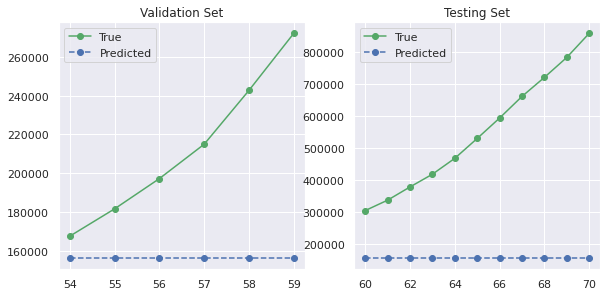

In [23]:
fig_lv=plt.figure(figsize=(15,10))
ax1=fig_lv.add_subplot(2,3,1)
ax1.plot(X_valid,Y_valid,color='g',linestyle='solid',label='True',marker='o')
ax1.plot(X_valid,y_tree_valid,color='b',linestyle='--',label='Predicted',marker='o')
ax1.set_title("Validation Set")
ax1.legend(loc='best')
ax2=fig_lv.add_subplot(2,3,2)
ax2.plot(X_test,Y_test,color='g',linestyle='solid',label='True',marker='o')
ax2.plot(X_test,y_tree_test,color='b',linestyle='--',label='Predicted',marker='o')
ax2.set_title("Testing Set")
ax2.legend(loc='best')

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Validation Set:")
print("Mean Absolute Error in Decison Trees:",mean_absolute_error(y_tree_valid,Y_valid))
print("Mean Squared Error in Decison Trees:",mean_squared_error(y_tree_valid,Y_valid))
print("Testing Set:")
print("Mean Absolute Error in Decison Trees:",mean_absolute_error(y_tree_test,Y_test))
print("Mean Squared Error in Decison Trees:",mean_squared_error(y_tree_test,Y_test))

Validation Set:
Mean Absolute Error in Decison Trees: 56560.333333333336
Mean Squared Error in Decison Trees: 4482679525.0
Testing Set:
Mean Absolute Error in Decison Trees: 393805.7272727273
Mean Squared Error in Decison Trees: 187024220121.9091


Using Gradient Boosting Methods.

In [25]:
# Gradient Boosting for Classification
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100,loss='deviance',random_state=0,learning_rate=0.05)
gb_clf.fit(X_train,Y_train)
y_gb_valid=gb_clf.predict(X_valid)
y_gb_test=gb_clf.predict(X_test)

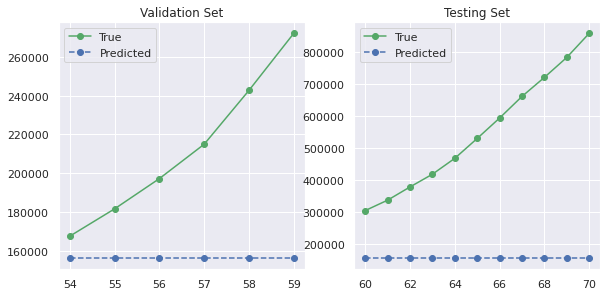

In [26]:
fig_lv=plt.figure(figsize=(15,10))
ax1=fig_lv.add_subplot(2,3,1)
ax1.plot(X_valid,Y_valid,color='g',linestyle='solid',label='True',marker='o')
ax1.plot(X_valid,y_gb_valid,color='b',linestyle='--',label='Predicted',marker='o')
ax1.set_title("Validation Set")
ax1.legend(loc='best')
ax2=fig_lv.add_subplot(2,3,2)
ax2.plot(X_test,Y_test,color='g',linestyle='solid',label='True',marker='o')
ax2.plot(X_test,y_gb_test,color='b',linestyle='--',label='Predicted',marker='o')
ax2.set_title("Testing Set")
ax2.legend(loc='best')

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Validation Set:")
print("Mean Absolute Error in Gradient Boosted Decison Trees:",mean_absolute_error(y_gb_valid,Y_valid))
print("Mean Squared Error in Gradient Boosted Decison Trees:",mean_squared_error(y_gb_valid,Y_valid))
print("Testing Set:")
print("Mean Absolute Error in Gradient Boosted Decison Trees:",mean_absolute_error(y_gb_test,Y_test))
print("Mean Squared Error in Gradient Boosted Decison Trees:",mean_squared_error(y_gb_test,Y_test))

Validation Set:
Mean Absolute Error in Gradient Boosted Decison Trees: 56560.333333333336
Mean Squared Error in Gradient Boosted Decison Trees: 4482679525.0
Testing Set:
Mean Absolute Error in Gradient Boosted Decison Trees: 393805.7272727273
Mean Squared Error in Gradient Boosted Decison Trees: 187024220121.9091


This dataset fits best with Polynomial regression because a curve made in graph seems to be polymonial of degree greater than or equal to 2.

Ridge Polynomial Regression works best with above dataset.